# Домашнее задание по теме "Дисперсионный анализ и A/B-тесты"

Ниже представлено несколько блоков задач. Пожалуйста, выполните их в этом ноутбуке, загрузите в [Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb?hl=ru) и предоставьте ссылку на него эксперту через Личный Кабинет.

In [1]:
 # Подгрузим пакеты 
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

### Блок 1

##### Задание № 1
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.

Не отклоняем нулевую гипотезу


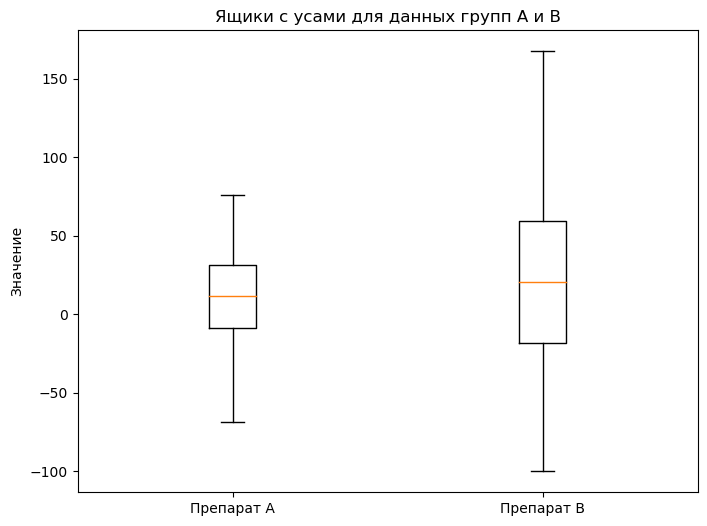

In [29]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)
data =\
    pd.DataFrame({
        'a': A,
        'b': B,
    })
#Так как у нас выборка состоит из 2 групп принял решение использовать t-критерий
stat, p = stats.ttest_ind(a=A, b=B, equal_var = True)
if p < 0.05:
  print("Отклоняем нулевую гипотезу")
else:
  print("Не отклоняем нулевую гипотезу")
# #Так как нулевую гипотезу мы не отклоняем из за p < 0.05 различия в эфекте не значительны
plt.figure(figsize=(8, 6))
plt.boxplot([A, B], labels=['Препарат A', 'Препарат B'])
plt.ylabel('Значение')
plt.title('Ящики с усами для данных групп A и B')

plt.show()

##### Задание № 2
Допустим, вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы — водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`

F-статистика: 12.525963044834192
P-значение: 2.9240047906326866e-05
Есть статистически значимые различия между группами.


<Figure size 800x600 with 0 Axes>

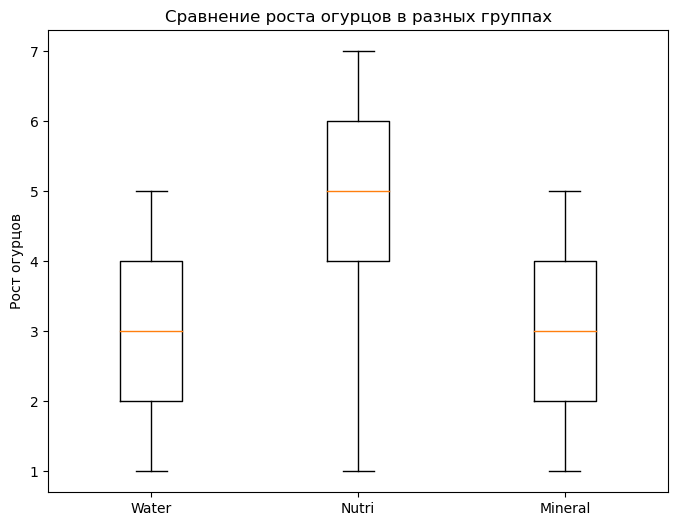

In [33]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral = [2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]
# Напишите Ваш код для решения задачи
f_statistic, p_value = stats.f_oneway(water, nutri, mineral)
# Выведем результаты
print(f"F-статистика: {f_statistic}")
print(f"P-значение: {p_value}")
if p_value < 0.05:
    print("Есть статистически значимые различия между группами.")
else:
    print("Нет статистически значимых различий между группами.")
    
data = [water, nutri, mineral]
labels = ['Water', 'Nutri', 'Mineral']

plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=labels)
plt.title('Сравнение роста огурцов в разных группах')
plt.ylabel('Рост огурцов')
plt.show()

### Блок 2
#### Cookie Cats

Cookie Cats — чрезвычайно популярная мобильная игра, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки.

По мере прохождения уровней игроки время от времени сталкиваются с воротами, которые заставляют их ждать или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота дают игрокам вынужденный перерыв в игре, что, как мы надеемся, приведёт к увеличению времени, проведённому в игре, и продлению удовольствия от игры.

<b>Но где ставить ворота? </b>
Изначально первые ворота были размещены на уровне `30`. В этом проекте вам предлагается проанализировать A/B-тест, в котором создатели переместили первые ворота в Cookie Cats с `30` уровня на уровень `40`. В частности, вам надо рассмотреть влияние A/B-теста на удержание игроков.

In [3]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

C:\Users\Павел\AppData\Local\Temp\ipykernel_12968\974058101.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения A/B-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.
* `version` - был ли игрок помещён в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).
* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - игрок вернулся и поиграл через 1 день после установки?
* `retention_7` - игрок вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

#### Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот.
    
**Замечание:** приведённых вспомогательных фрагментов кода не хватает для ответа на вопрос. 

Делать выводы необходимо, опираясь на статистические тесты, разобранные в лекции. 

Большим плюсом будет построение визуализиции для подтверждения ваших выводов. Рекомендуем использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и `matplotlib`

In [15]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,222944098441,2344795,20034,8502
gate_40,227857702576,2333530,20119,8279


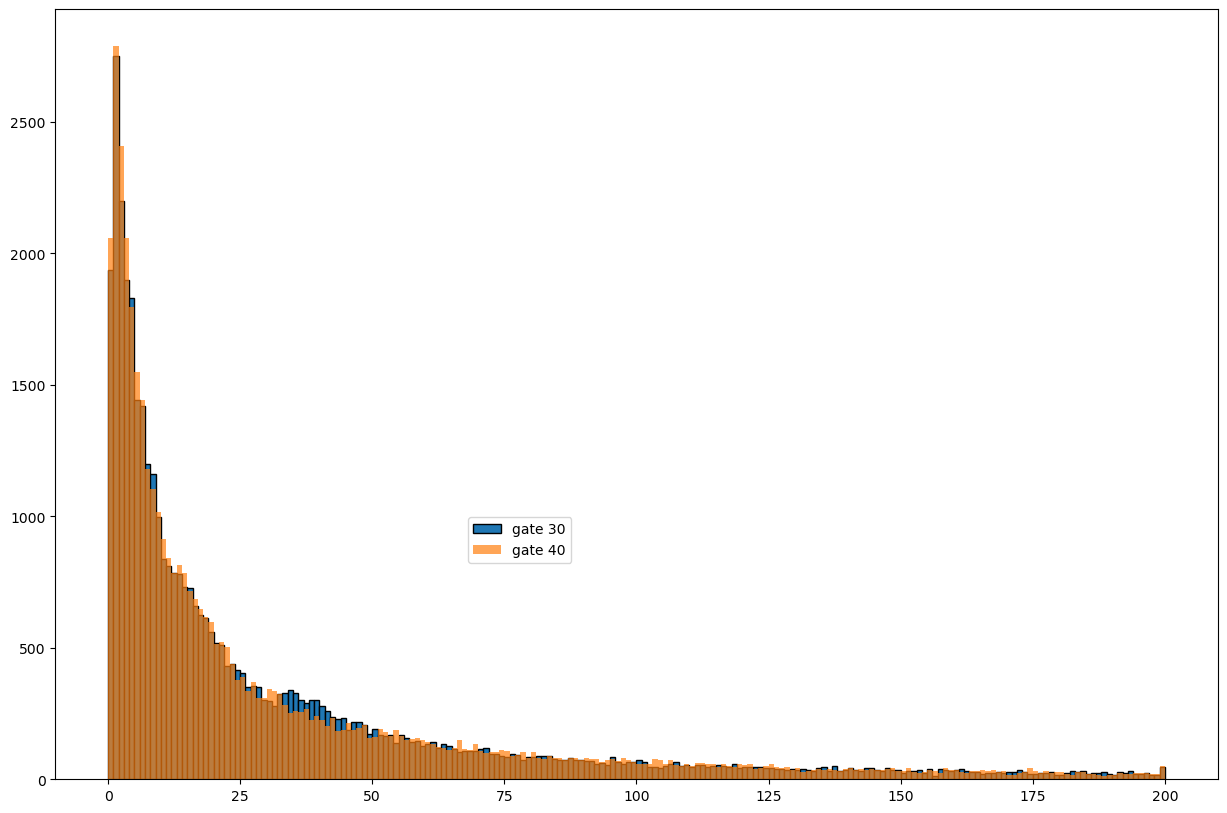

In [5]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

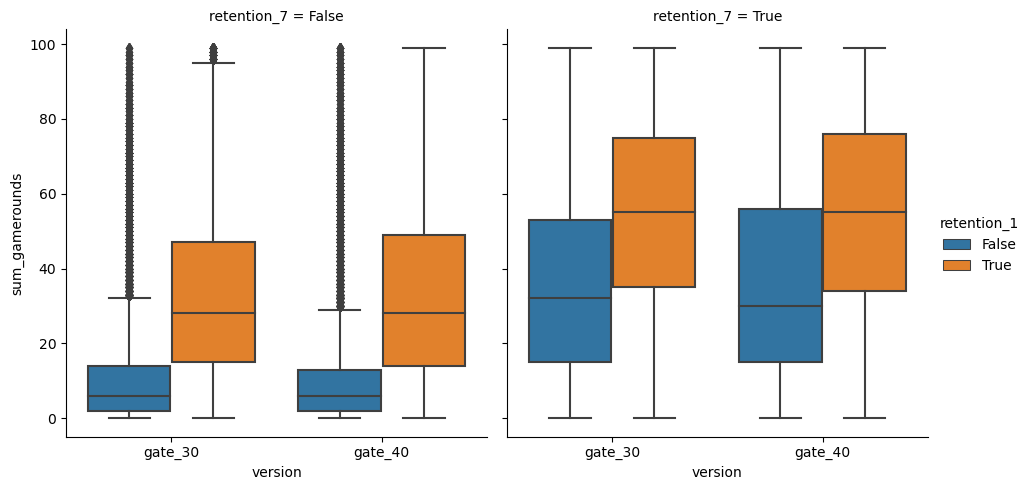

In [6]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


<Axes: ylabel='Density'>

<Figure size 1500x1000 with 0 Axes>

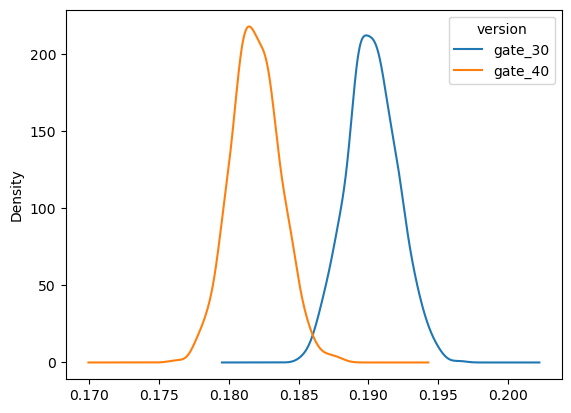

In [7]:
#Если вдруг оказалось сложно, то вот ещё один способ визуализации различий
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
boot_1d.plot(kind='density')

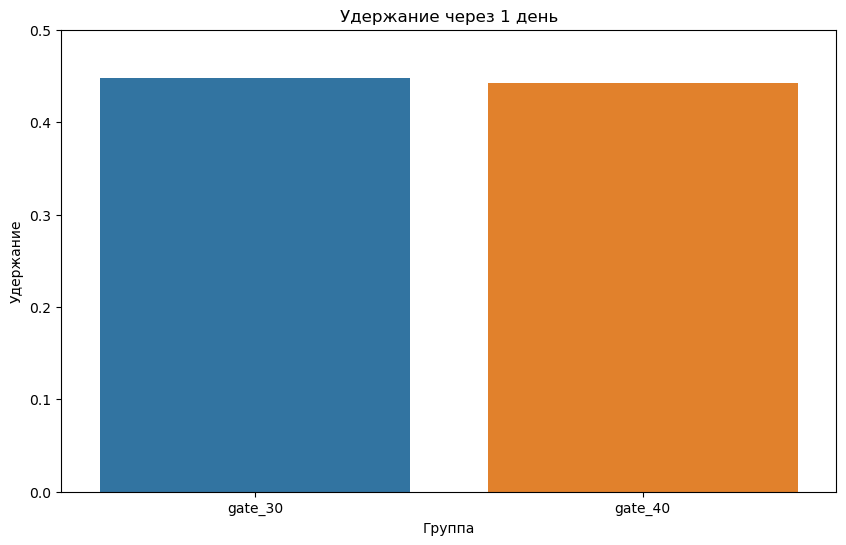

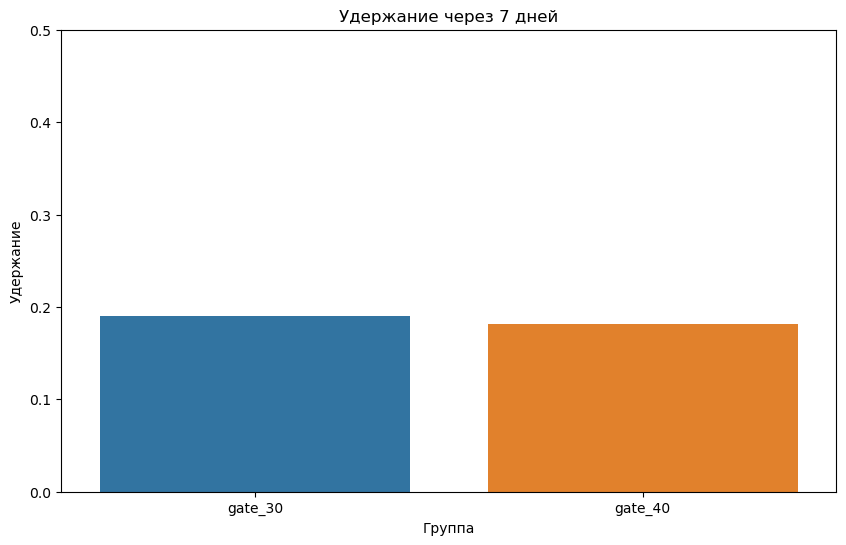

1024331250.5 0.05020880772044255
Статистика=1.048, p=0.22774
Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые
Статистика=102.984, p=0.0000000000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [30]:
from scipy.stats import f_oneway 
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

# Посмотрим на удержание игроков (retention) для каждой из групп (gate_30 и gate_40)
retention_1 = data.groupby('version')['retention_1'].mean()
retention_7 = data.groupby('version')['retention_7'].mean()

# Построим графики для удержания
plt.figure(figsize=(10, 6))
sns.barplot(x=retention_1.index, y=retention_1.values)
plt.title('Удержание через 1 день')
plt.xlabel('Группа')
plt.ylabel('Удержание')
plt.ylim(0, 0.5)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=retention_7.index, y=retention_7.values)
plt.title('Удержание через 7 дней')
plt.xlabel('Группа')
plt.ylabel('Удержание')
plt.ylim(0, 0.5)
plt.show()
#По графикам видно что отличие в удержании не значительно. Немного больше удержание когда ворота на 30.
#Использование теста Манна Уитни более предпочтительнее так как в данных  есть сильные выбросы
stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
print(stat, p)
#Значение p близко к 0.05, поэтому тяжело сказать о зависимости. Можно проверить равенство дисперссий. Сделаем это с помощью F-теста. Используем собстенную функцию.
def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-stats.f.cdf(f, nun, dun)
    return f, p_value

stat, p = f_test(boot_1d['gate_30'], boot_1d['gate_40'])

print('Статистика=%.3f, p=%.5f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются')
 #Так как значение p>0.05 можно использовать тест Стьюдента
stat, p = stats.ttest_ind(boot_1d['gate_30'], boot_1d['gate_40'])
print('Статистика=%.3f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Ниже, пожалуйста, напишите Ваши выводы на основании решения: 
p-значение составило около 0.05, что говорит о том, что нет статистически значимых различий между этими двумя группами.
Однако проведя дополнительные 2 теста F-тест и t-тест можно сказать что всетаки взаимосвязь есть и перемещение ворот на 40 уровень произведет статически значимое влияние на удержание игроков в игре.

### Блок 3
#### Покемоны и A/B-тестирование

Покемоны — это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) и относятся к одному или двум так называемым классам (вода, огонь и т. д.).

Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

**Описание набора данных**
Профессор Оук скопировал всё содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

**Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается, что они имеют одинаковую значимость.**

In [2]:
# Откроем датасет

pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)
pokemon.head()

C:\Users\Павел\AppData\Local\Temp\ipykernel_16344\3650493355.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


**Задание № 1**
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем покемоны в классе `rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание: 
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [4]:
grass_pokemon = pokemon[pokemon["Class 1"] == "Grass"]
rock_pokemon = pokemon[pokemon["Class 1"] == "Rock"]
mean_grass_attack = grass_pokemon['Attack'].mean()
mean_rock_attack = rock_pokemon['Attack'].mean()
t_statistic, p_value = stats.ttest_ind(grass_pokemon['Attack'], rock_pokemon['Attack'], equal_var=False, alternative='greater')
print("Статистика t:", t_statistic)
print("P-значение:", p_value)
if p_value < 0.05:
    print(f"Среднее значение обычной атаки в классе 'grass' ({mean_grass_attack}) статистически выше, чем в классе 'rock' ({mean_rock_attack}).")
else:
    print(f"Среднее значение обычной атаки в классе 'grass' ({mean_grass_attack}) не статистически выше, чем в классе 'rock' ({mean_rock_attack}).")
    
#Следовательно, гипотеза профессора о том, что среднее значение обычной атаки в классе "grass" выше, не подтверждается статистически.

Статистика t: -3.20601097459528
P-значение: 0.9989896717530655
Среднее значение обычной атаки в классе 'grass' (73.21428571428571) не статистически выше, чем в классе 'rock' (92.86363636363636).


**Задание № 2**
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос: а правда ли, что покемоны в классе `Water` в среднем быстрее покемонов в классе `Normal`. 

Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: 
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [8]:
water_pokemon = pokemon[pokemon["Class 1"] == "Water"]
normal_pokemon = pokemon[pokemon["Class 1"] == "Normal"]
t_statistic, p_value = stats.ttest_ind(water_pokemon["Speed"], normal_pokemon["Speed"], alternative='greater')
# Сравнение средних значений
mean_water_speed = water_pokemon["Speed"].mean()
mean_normal_speed = normal_pokemon["Speed"].mean()
print("Статистика t:", t_statistic)
print("P-значение:", p_value)
if p_value < 0.05:
    print("Среднее значение скорости в классе 'Water' ({:.2f}) статистически значимо выше, чем в классе 'Normal' ({:.2f}).".format(mean_water_speed, mean_normal_speed))
else:
    print("Среднее значение скорости в классе 'Water' ({:.2f}) не статистически значимо выше, чем в классе 'Normal' ({:.2f}).".format(mean_water_speed, mean_normal_speed))
#Следовательно, на основе результатов t-теста, мы не можем сделать статистически значимый вывод о том, что покемоны класса "Water" в среднем быстрее покемонов класса "Normal".

65.96428571428571 71.55102040816327
Статистика t: -1.5732662827713622
P-значение: 0.9414114959832105
Среднее значение скорости в классе 'Water' (65.96) не статистически значимо выше, чем в классе 'Normal' (71.55).


**Задание № 3:**
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. 
Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку некоторым покемонам (массив `treathed_pokemon`). 
Проверьте, работает ли вообще его сыворотка, и убедите всех в своем выводе статистически.
    
    
*Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.*

In [6]:
# Покемоны, которые принимали сыворотку
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']
# Выборка покемонов, которые получили сыворотку (treated_pokemon) и которые не получали сыворотку
treated_pokemon = pokemon[pokemon["Name"].isin(treathed_pokemon)]
untreated_pokemon = pokemon[~pokemon["Name"].isin(treathed_pokemon)]

In [7]:
t_statistic, p_value = stats.ttest_ind(treated_pokemon['Speed'], untreated_pokemon['Speed'], equal_var=True, alternative='greater')
mean_speed_treated = treated_pokemon['Speed'].mean()
mean_speed_untreated = untreated_pokemon['Speed'].mean()
print("Статистика t:", t_statistic)
print("P-значение:", p_value)
print(f"Среднее значение скорости сыворотки: {mean_speed_treated}")
print(f"Среднее значение скорости без сыворотки: {mean_speed_untreated}")
if p_value < 0.05:
    print("Сыворотка профессора Оука статистически значимо увеличивает скорость покемонов.")
else:
    print("Сыворотка профессора Оука не имеет статистически значимого влияния на скорость покемонов.")
#Следовательно, на основе результатов t-теста, можно сделать вывод о том, что сыворотка профессора Оука действительно увеличивает скорость движения покемонов. 

Статистика t: 5.385407401082377
P-значение: 4.75755058815393e-08
Среднее значение скорости сыворотки: 145.0
Среднее значение скорости без сыворотки: 67.89195979899498
Сыворотка профессора Оука статистически значимо увеличивает скорость покемонов.


**Задание № 4**
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов. 
Оук предложил разобраться в этом Вам. 

Действительно ли сумма характеристик `HP`, `Attack`, `Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров? 

Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [44]:
legendary_pokemon = pokemon[pokemon["Legendary"] == True]
non_legendary_pokemon = pokemon[pokemon["Legendary"] == False]
#Посчитаем суммы характиристик и умножения характиристик и добавим их в данные
legendary_pokemon["Sum_HAD"] = legendary_pokemon["HP"] + legendary_pokemon["Attack"] + legendary_pokemon["Defense"]
non_legendary_pokemon["Sum_HAD"] = non_legendary_pokemon["HP"] + non_legendary_pokemon["Attack"] + non_legendary_pokemon["Defense"]

legendary_pokemon["multiplication_HAD"] = legendary_pokemon["HP"] * legendary_pokemon["Attack"] * legendary_pokemon["Defense"]
non_legendary_pokemon["multiplication_HAD"] = non_legendary_pokemon["HP"] * non_legendary_pokemon["Attack"] * non_legendary_pokemon["Defense"]
#Произведем t - тест
t_statistic_sum, p_value_sum = stats.ttest_ind(legendary_pokemon["Sum_HAD"], non_legendary_pokemon["Sum_HAD"])
t_statistic_multiplication, p_value_multiplication = stats.ttest_ind(legendary_pokemon["multiplication_HAD"], non_legendary_pokemon["multiplication_HAD"])
# Вывод результатов
print("T-тест для суммы характеристик HP, Attack и Defense:")
print("Статистика t:", t_statistic_sum)
print("P-значение:", p_value_sum)

print("T-тест для произведения характеристик HP, Attack и Defense:")
print("Статистика t:", t_statistic_multiplication)
print("P-значение:", p_value_multiplication)
if p_value_sum < 0.05:
    print("Сумма характеристик HP, Attack и Defense легендарных покемонов статистически выше.")
else:
    print("Нет статистически значимых различий в сумме характеристик между легендарными и обычными покемонами.")

if p_value_multiplication < 0.05:
    print("Произведение характеристик HP, Attack и Defense легендарных покемонов статистически выше.")
else:
    print("Нет статистически значимых различий в произведении характеристик между легендарными и обычными покемонами.")
#Следовательно, на основе результатов t-тестов, можно сделать вывод о том, что легендарные покемоны имеют статистически значимо более высокую сумму и произведение характеристик HP, Attack и Defense по сравнению с обычными покемонами.

T-тест для суммы характеристик HP, Attack и Defense:
Статистика t: 11.591852366462316
P-значение: 7.970942205722087e-29
T-тест для произведения характеристик HP, Attack и Defense:
Статистика t: 13.263253408231844
P-значение: 1.992664308842282e-36
Сумма характеристик HP, Attack и Defense легендарных покемонов статистически выше.
Произведение характеристик HP, Attack и Defense легендарных покемонов статистически выше.


C:\Users\Павел\AppData\Local\Temp\ipykernel_12968\1557177745.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  legendary_pokemon["Sum_HAD"] = legendary_pokemon["HP"] + legendary_pokemon["Attack"] + legendary_pokemon["Defense"]
C:\Users\Павел\AppData\Local\Temp\ipykernel_12968\1557177745.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_legendary_pokemon["Sum_HAD"] = non_legendary_pokemon["HP"] + non_legendary_pokemon["Attack"] + non_legendary_pokemon["Defense"]
C:\Users\Павел\AppData\Local\Temp\ipyk

**Задание № 5**
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса (массив `best_defence_class`), которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. 

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо. Все та же статистика Вам в помощь! 

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [46]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']

In [47]:
class_samples = [pokemon[pokemon["Class 1"] == class_name]["Defense"] for class_name in best_defence_class]
#Здесь правильнее будет использовать F-статистику так как речь идет о более 2 группах.
f_statistic, p_value = stats.f_oneway(*class_samples)
print("F-статистика:", f_statistic)
print("P-значение:", p_value)
if p_value < 0.05:
    print("Есть статистически значимые различия в уровне защиты между классами.")
else:
    print("Нет статистически значимых различий в уровне защиты между классами.")
#Результаты анализа показывают, что классы "Rock", "Ground", "Steel" и "Ice" статистически значимо различаются по уровню защиты, и, возможно, один из этих классов имеет более высокий уровень защиты, чем другие.

F-статистика: 10.576882027817977
P-значение: 3.0803014649204294e-06
Есть статистически значимые различия в уровне защиты между классами.
